# NBA Moneyline Model 
### By Matt Pucci 

#### One of my passions in life is sports.  I love playing them and I especially love watching them.  With today's emerging sportsbook market, I wanted to focus my project on a model that could be used by both fans and sports bettors to put some data driven insight behind their moneyline picks.  In sportsbetting Moneyline simply means win or lose, there is no point spread involved.  The dataset was taken from Kaggle and the methodology used in this project was the traditional OSEMIN.  

# 1. Obtain Data

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline
from scipy.stats import randint
seed = 330
np.random.seed(seed)

In [2]:
pip install lightgbm 

Note: you may need to restart the kernel to use updated packages.


In [46]:
import lightgbm as lgbm

In [47]:
pwd

'/Users/mattpucci/Desktop'

In [48]:
cd /Users/mattpucci/Desktop

/Users/mattpucci/Desktop


In [49]:
ls

2012-18_officialBoxScore.csv
2016-17_officialBoxScore.csv
2016-17_playerBoxScore.csv
2016-17_standings.csv
2016-17_teamBoxScore.csv
2017-18_officialBoxScore.csv
2017-18_playerBoxScore.csv
2017-18_standings.csv
2017-18_teamBoxScore.csv
Cover Letter.pdf
RCdata/
Restaurant Project Data/
Screen Shot 2020-04-08 at 11.07.10 AM.png
Screen Shot 2020-04-08 at 8.03.30 PM.png
Screen Shot 2020-04-20 at 9.04.32 AM.png
Screen Shot 2020-04-20 at 9.04.42 AM.png
UI Online - Doc_20200409083848.pdf
all_seasons.csv
eight.csv
five.csv
four.csv
nine.csv
one.csv
seven.csv
six.csv
teamBoxScore.csv
three.csv
two.csv
untitled folder/
~$ver Letter.docx


# Let's take an exploratory look at the NBA 2016-2017 team box score dataset and do some Preprocessing. 

In [136]:
df= pd.read_csv('2016-17_teamBoxScore.csv')
df.head()

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2016-10-25,08:00,Regular,Lane,Karl,Adams,Bennie,Kennedy,Bill,NY,...,84.9585,116.5653,87.6731,28.8922,0.4592,20.8951,2.0667,80.0000,100.3729,100.3729
1,2016-10-25,08:00,Regular,Lane,Karl,Adams,Bennie,Kennedy,Bill,CLE,...,41.6667,87.6731,116.5653,-28.8922,0.3478,12.9969,0.9444,33.3333,100.3729,99.9564
2,2016-10-25,10:00,Regular,Buchert,Nick,Callahan,Mike,Brown,Tony,UTA,...,69.6653,122.1120,112.3863,9.7257,0.4699,18.3824,1.6923,38.4615,92.5380,92.1540
3,2016-10-25,10:00,Regular,Buchert,Nick,Callahan,Mike,Brown,Tony,POR,...,58.7137,112.3863,122.1120,-9.7257,0.4444,15.5687,1.3571,64.2857,92.5380,92.9252
4,2016-10-25,10:30,Regular,Maddox,Tre,Fraher,Pat,Crawford,Dan,SA,...,60.7884,101.2387,130.5979,-29.3592,0.4301,18.0560,1.5000,68.7500,98.7765,98.7765


In [137]:
df_test = pd.read_csv('2017-18_teamBoxScore.csv')
df_test.head()

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2017-10-17,08:00,Regular,Forte,Brian,Smith,Michael,McCutchen,Monty,BOS,...,55.5208,101.7143,98.7227,2.9916,0.4176,14.6154,1.1176,17.6471,100.2809,99.8648
1,2017-10-17,08:00,Regular,Forte,Brian,Smith,Michael,McCutchen,Monty,CLE,...,62.5519,98.7227,101.7143,-2.9916,0.3956,17.7778,2.0000,91.6667,100.2809,100.2809
2,2017-10-17,10:30,Regular,Maddox,Tre,Garretson,Ron,Foster,Scott,HOU,...,86.2033,118.0353,119.0108,-0.9755,0.4725,24.2442,2.0000,29.4118,102.5117,102.9406
3,2017-10-17,10:30,Regular,Maddox,Tre,Garretson,Ron,Foster,Scott,GS,...,81.9038,119.0108,118.0353,0.9755,0.4700,19.1309,2.1538,69.2308,102.5117,102.0863
4,2017-10-18,07:00,Regular,Davis,Marc,Boland,Matt,DeRosa,Joe,CHA,...,70.7113,103.0506,90.9270,12.1236,0.4271,17.8731,2.6667,155.5556,98.9805,99.8123


In [138]:
df_copy = df.copy()

# 2. Data Scrubbing/Preprocessing

In [139]:
date_value = pd.to_datetime(df['gmDate'], errors='coerce')
time_value = pd.to_datetime(df['gmTime'], errors='coerce')


df['year'] = date_value.dt.year 
df['month'] = date_value.dt.month 
df['day'] = date_value.dt.day 
df['hour'] = time_value.dt.hour 
df['minute'] = time_value.dt.minute

del df['gmDate']
del df['gmTime']

In [140]:
date_value = pd.to_datetime(df_test['gmDate'], errors='coerce')
time_value = pd.to_datetime(df_test['gmTime'], errors='coerce')


df_test['year'] = date_value.dt.year 
df_test['month'] = date_value.dt.month 
df_test['day'] = date_value.dt.day 
df_test['hour'] = time_value.dt.hour 
df_test['minute'] = time_value.dt.minute

del df_test['gmDate']
del df_test['gmTime']

In [141]:
missing_data = [col for col in df.columns if df[col].isnull().any()] 
df.drop(missing_data, axis=1, inplace=True)
df_test.drop(missing_data, axis=1, inplace=True)

In [142]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = df.columns.values.tolist()
for col in features:
    if df[col].dtype in numerics: continue
    categorical_columns.append(col)
indexer = {}
for col in categorical_columns:
    if df[col].dtype in numerics: continue
    _, indexer[col] = pd.factorize(df[col])
    
for col in categorical_columns:
    if df[col].dtype in numerics: continue
    df[col] = indexer[col].get_indexer(df[col])

In [143]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = df_test.columns.values.tolist()
for col in features:
    if df[col].dtype in numerics: continue
    categorical_columns.append(col)
indexer = {}
for col in categorical_columns:
    if df_test[col].dtype in numerics: continue
    _, indexer[col] = pd.factorize(df_test[col])
    
for col in categorical_columns:
    if df_test[col].dtype in numerics: continue
    df_test[col] = indexer[col].get_indexer(df_test[col])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa341e34ad0>,
      dtype=object)

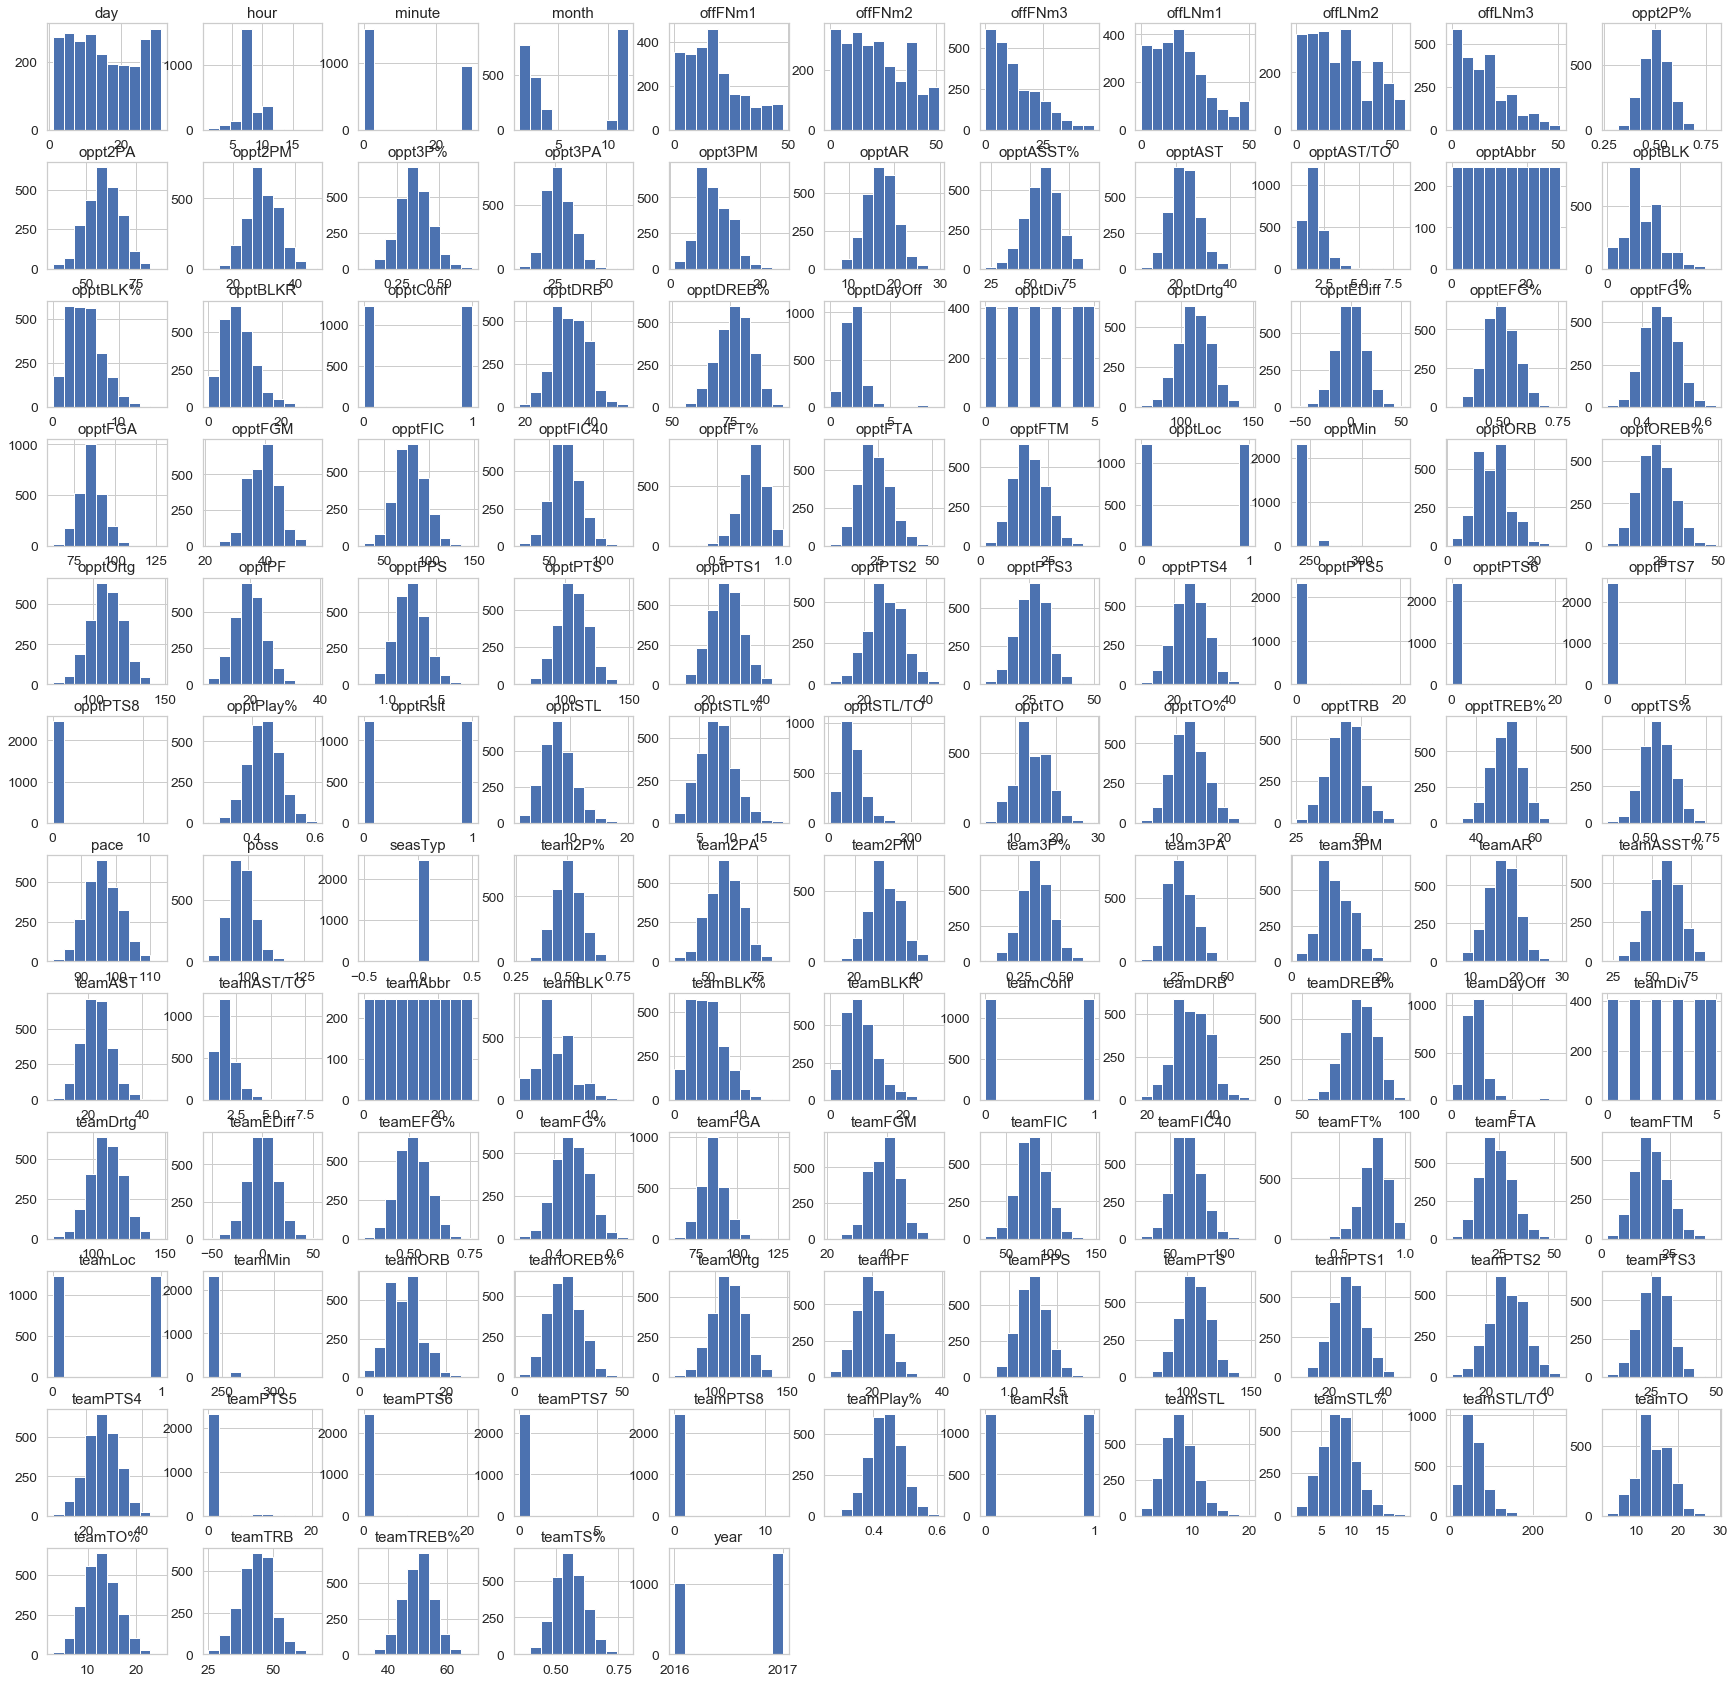

In [58]:
df.hist(figsize=(30,30))

## Not all of the data looks standardly distributed.  Let's now check and see if there are any strong correlations.

# 3. Data Exploration

Text(0.5, 1, 'Figure 1: Seaborn Data Correlation Heat Map')

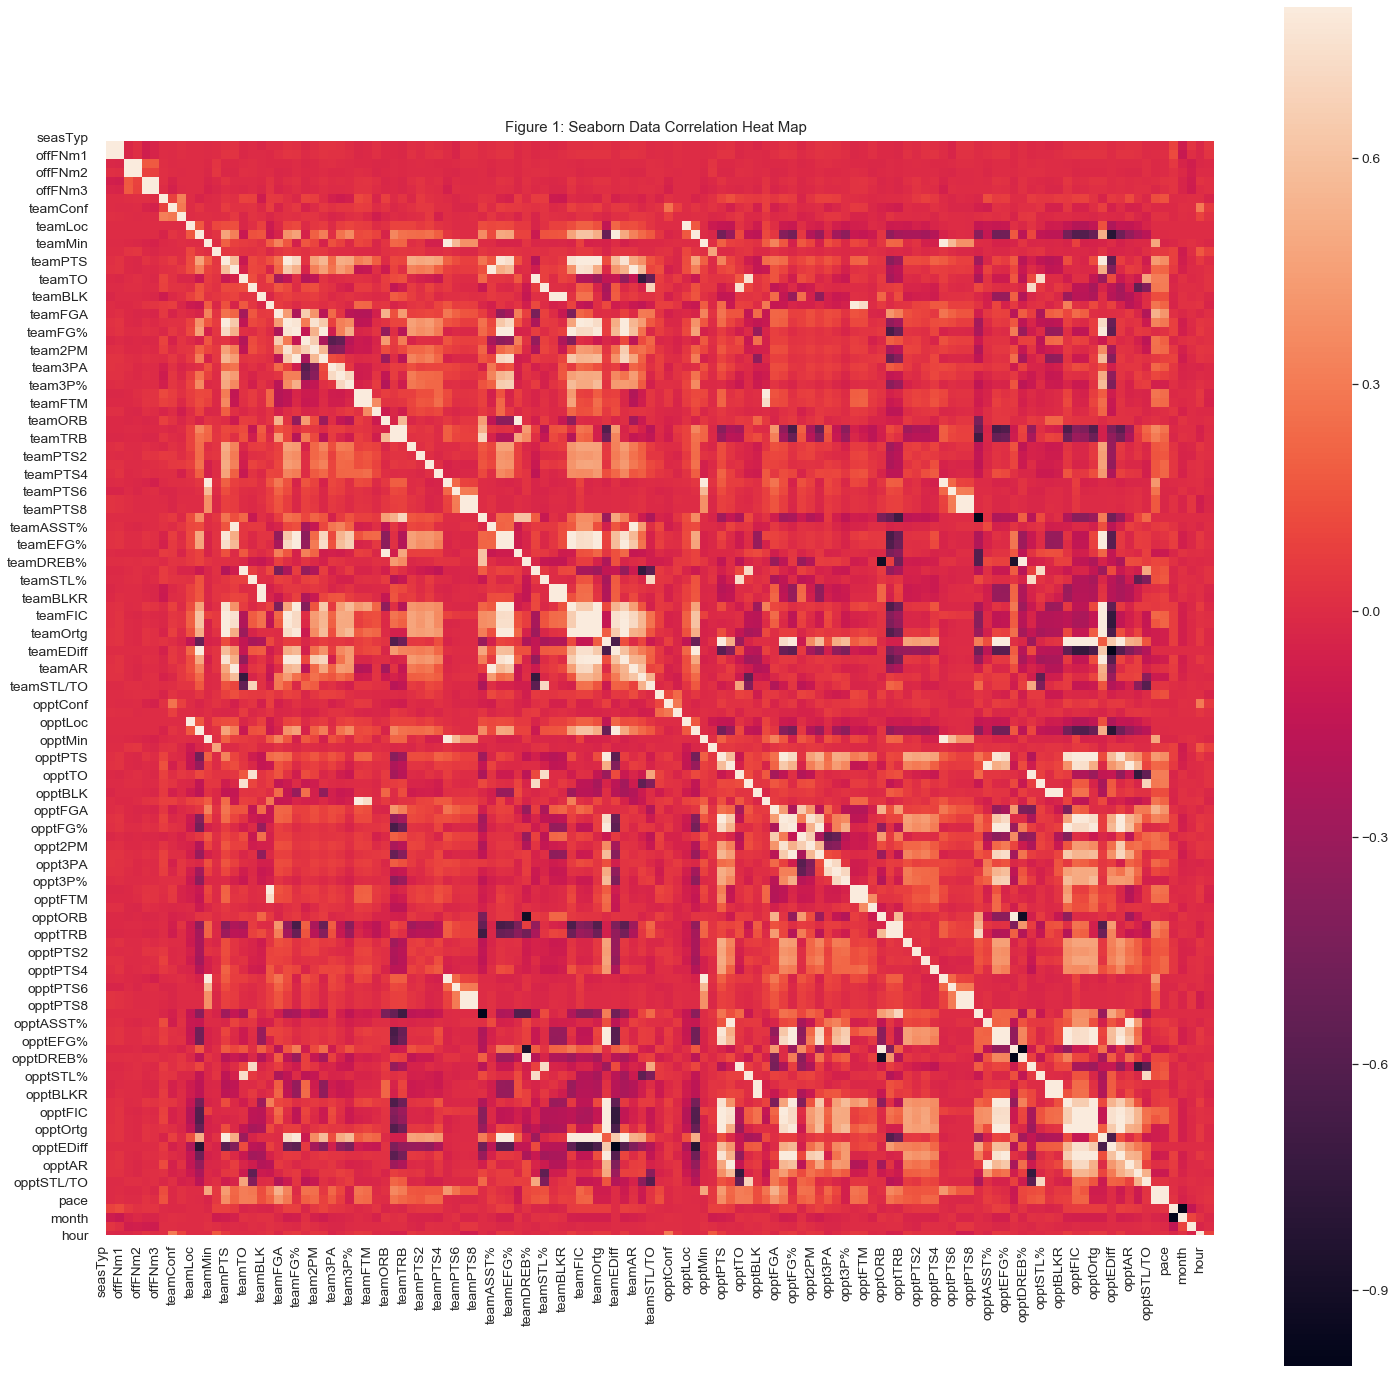

In [59]:
df_corr = df.corr()
f, ax = plt.subplots(figsize=(25,25))
sns.heatmap(df_corr, vmax=.8, square=True).set_title('Figure 1: Seaborn Data Correlation Heat Map') 

### There is far too much going on in the above visual to make good sense of it.  Let's take a look at the 10 highest correlated features with more clarity.  

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np 
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
import pickle

In [61]:
df.teamRslt.value_counts()

1    1230
0    1230
Name: teamRslt, dtype: int64

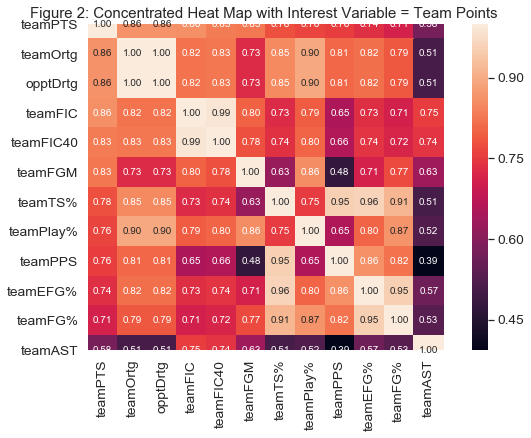

<Figure size 1800x1800 with 0 Axes>

In [62]:
k = 12
cols = df_corr.nlargest(k, 'teamPTS')['teamPTS'].index
f, ax = plt.subplots(figsize=(10,6))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
teampts_heat = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title("Figure 2: Concentrated Heat Map with Interest Variable = Team Points ")
plt.figure(figsize=(25,25))
plt.show()

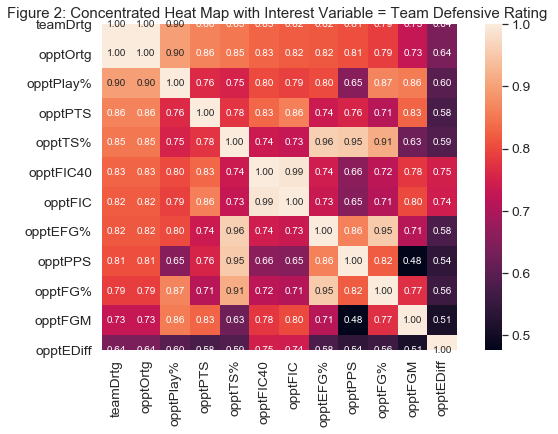

<Figure size 1800x1800 with 0 Axes>

In [63]:
k = 12
cols = df_corr.nlargest(k, 'teamDrtg')['teamDrtg'].index
f, ax = plt.subplots(figsize=(10,6))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
teampts_heat = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title("Figure 2: Concentrated Heat Map with Interest Variable = Team Defensive Rating ")
plt.figure(figsize=(25,25))
plt.show()

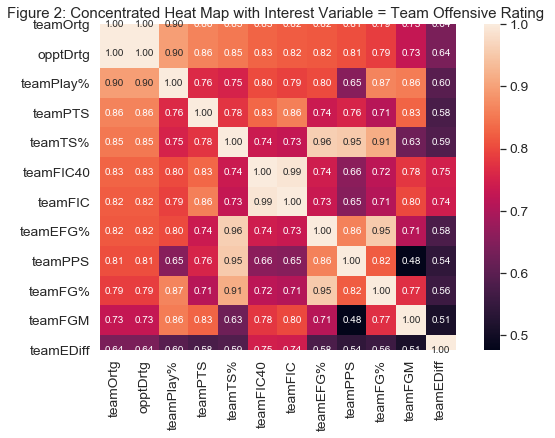

<Figure size 1800x1800 with 0 Axes>

In [64]:
k = 12
cols = df_corr.nlargest(k, 'teamOrtg')['teamOrtg'].index
f, ax = plt.subplots(figsize=(10,6))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
teampts_heat = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title("Figure 2: Concentrated Heat Map with Interest Variable = Team Offensive Rating ")
plt.figure(figsize=(25,25))
plt.show()

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.4, random_state=2)

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1476, 120)
(984, 120)
(1476,)
(984,)


In [25]:
import lightgbm as lgbm
train_set= lgbm.Dataset(x_train, y_train, silent=False)
valid_set = lgbm.Dataset(x_test, y_test, silent=False)

params = {
        'boosting_type':'gbdt', 'objective': 'regression', 'num_leaves': 31,
        'learning_rate': 0.05, 'max_depth': -1, 'subsample': 0.8,
        'bagging_fraction' : 1, 'max_bin' : 5000 , 'bagging_freq': 20,
        'colsample_bytree': 0.6, 'metric': 'rmse', 'min_split_gain': 0.5,
        'scale_pos_weight':1,'seed':0,        
    }

Training until validation scores don't improve for 50 rounds
[10]	valid_0's rmse: 0.346787
[20]	valid_0's rmse: 0.266706
[30]	valid_0's rmse: 0.226115
[40]	valid_0's rmse: 0.210231
[50]	valid_0's rmse: 0.202232
[60]	valid_0's rmse: 0.197963
[70]	valid_0's rmse: 0.197377
[80]	valid_0's rmse: 0.197377
[90]	valid_0's rmse: 0.197377
[100]	valid_0's rmse: 0.197377
[110]	valid_0's rmse: 0.197377
Early stopping, best iteration is:
[66]	valid_0's rmse: 0.197377


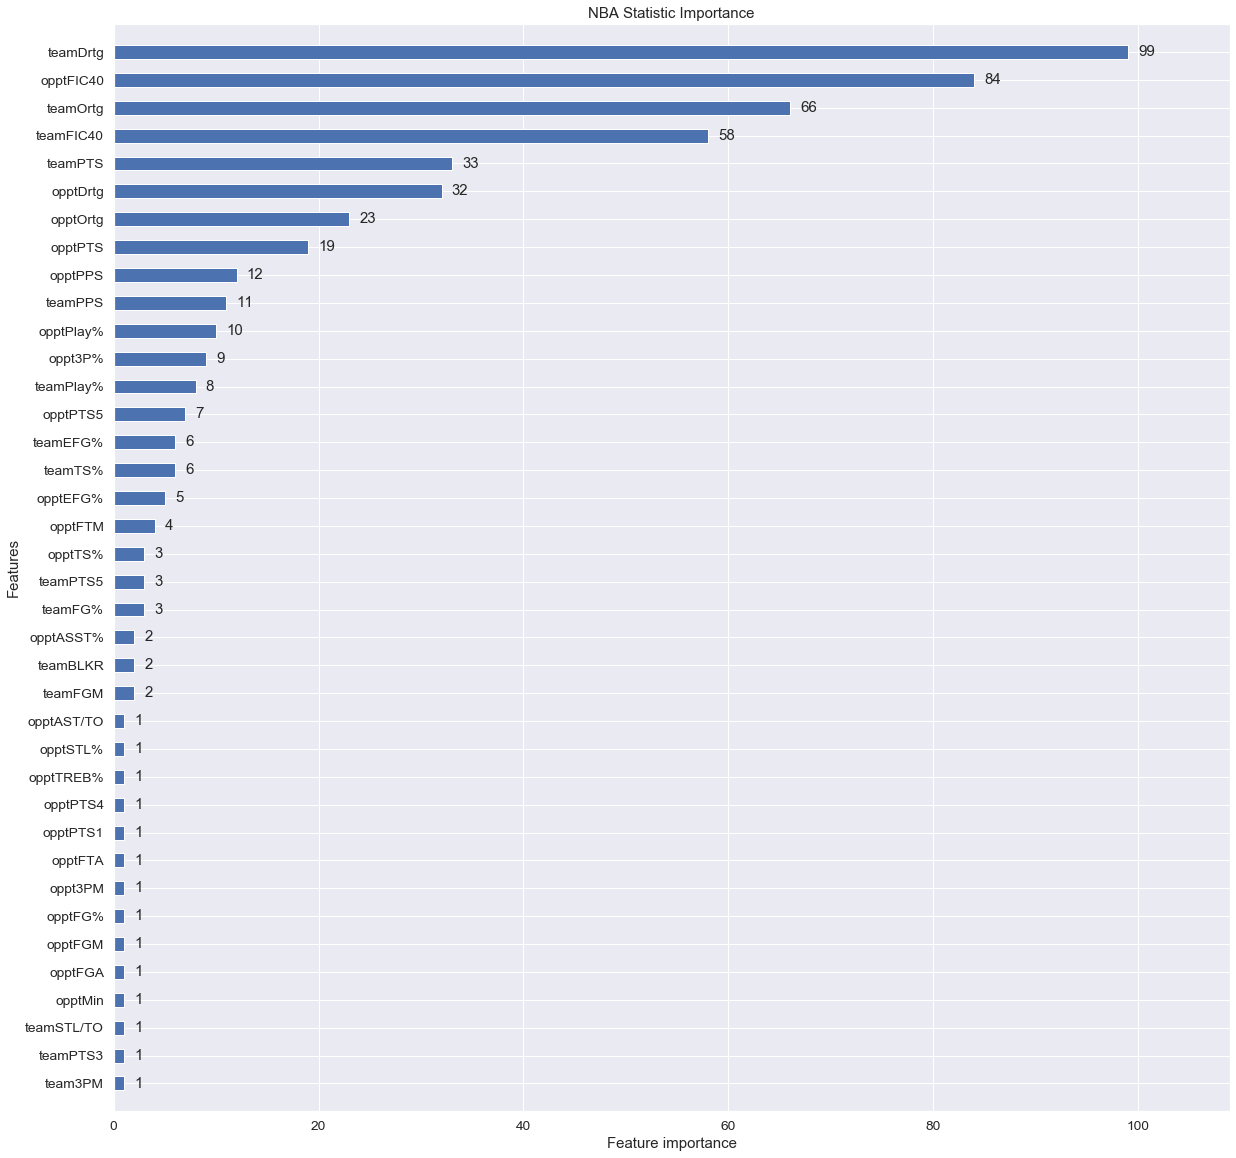

In [26]:
model1 = lgbm.train(params, train_set = train_set, num_boost_round=1000,early_stopping_rounds=50,verbose_eval=10, valid_sets=valid_set)

fig =  plt.figure(figsize = (20,20))
axes = fig.add_subplot(111)
lgbm.plot_importance(model1,ax = axes,height = 0.5)
plt.title('NBA Statistic Importance')
plt.show();

In [65]:
y = df['teamRslt']

drop = ['teamRslt', 'opptRslt', 'teamEDiff', 'teamFIC', 'opptEDiff', 'opptFIC']

df.drop(drop, axis=1, inplace=True)

x = df;

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

In [67]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1968, 120)
(492, 120)
(1968,)
(492,)


In [159]:
best_features = ['opptPTS', 'teamDrtg', 'teamTO', 'teamORB', 'teamFGM']
x = x[feature_columns];

x.head()

,opptPTS,teamDrtg,teamTO,teamORB,teamFGM
0,117,116.5653,18,13,32
1,88,87.6731,15,11,45
2,113,122.1120,14,6,40
3,104,112.3863,13,5,39
4,100,101.2387,14,21,47


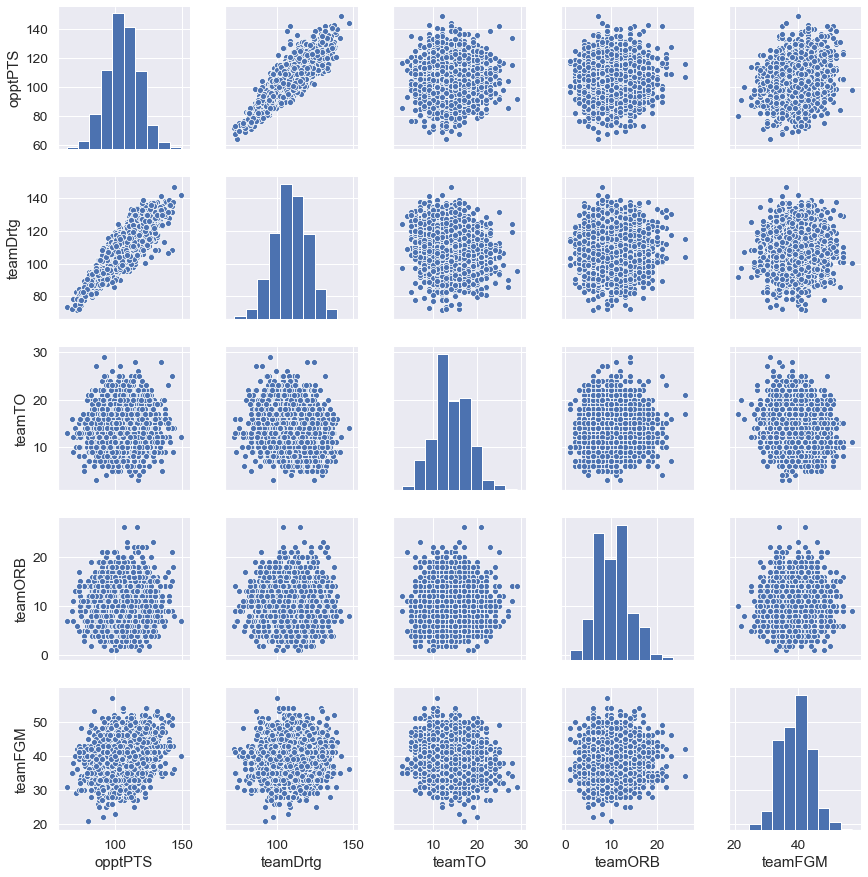

In [109]:
best_features = ['opptPTS', 'teamDrtg', 'teamTO', 'teamORB', 'teamFGM']
sns.pairplot(df[best_features], height=2.5)
plt.show()

# 4. Data Modeling

In [110]:
def parseResult(data):
    def parse(n): 
        left = n[0] 
        rigth = n[1]
        return 1 if left > rigth else 2
    
    return list(map(parse, data))

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

In [112]:
from sklearn.metrics import accuracy_score

In [113]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
results = []
result = accuracy_score(y_test, pred)
results.append(result)
print(result)

0.8130081300813008


In [114]:
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [115]:
pred = randomforest.predict(x_test)
print(metrics.accuracy_score(y_test, pred))

0.8211382113821138


In [116]:
gradient_boost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, 
                                    max_depth=1, random_state=0).fit(x_train, y_train)

result = gradient_boost.score(x_test, y_test)
results.append(result)
print(result)

0.8414634146341463


In [117]:
df_test.head()

,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,teamConf,teamDiv,...,opptAR,opptAST/TO,opptSTL/TO,poss,pace,year,month,day,hour,minute
0,Regular,Forte,Brian,Smith,Michael,McCutchen,Monty,BOS,East,Atlantic,...,14.6154,1.1176,17.6471,100.2809,99.8648,2017,10,17,8,0
1,Regular,Forte,Brian,Smith,Michael,McCutchen,Monty,CLE,East,Central,...,17.7778,2.0000,91.6667,100.2809,100.2809,2017,10,17,8,0
2,Regular,Maddox,Tre,Garretson,Ron,Foster,Scott,HOU,West,Southwest,...,24.2442,2.0000,29.4118,102.5117,102.9406,2017,10,17,10,30
3,Regular,Maddox,Tre,Garretson,Ron,Foster,Scott,GS,West,Pacific,...,19.1309,2.1538,69.2308,102.5117,102.0863,2017,10,17,10,30
4,Regular,Davis,Marc,Boland,Matt,DeRosa,Joe,CHA,East,Southeast,...,17.8731,2.6667,155.5556,98.9805,99.8123,2017,10,18,7,0


In [161]:
x_new = df_test[best_features]
y_new = df_test['teamRslt']
x_new.head()

,opptPTS,teamDrtg,teamTO,teamORB,teamFGM
0,102,101.7143,12,9,36
1,99,98.7227,17,9,38
2,121,118.0353,13,10,47
3,122,119.0108,17,6,43
4,102,103.0506,17,3,29


In [119]:
df_test.dropna()

,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,teamConf,teamDiv,...,opptAR,opptAST/TO,opptSTL/TO,poss,pace,year,month,day,hour,minute
0,Regular,Forte,Brian,Smith,Michael,McCutchen,Monty,BOS,East,Atlantic,...,14.6154,1.1176,17.6471,100.2809,99.8648,2017,10,17,8,0
1,Regular,Forte,Brian,Smith,Michael,McCutchen,Monty,CLE,East,Central,...,17.7778,2.0000,91.6667,100.2809,100.2809,2017,10,17,8,0
2,Regular,Maddox,Tre,Garretson,Ron,Foster,Scott,HOU,West,Southwest,...,24.2442,2.0000,29.4118,102.5117,102.9406,2017,10,17,10,30
3,Regular,Maddox,Tre,Garretson,Ron,Foster,Scott,GS,West,Pacific,...,19.1309,2.1538,69.2308,102.5117,102.0863,2017,10,17,10,30
4,Regular,Davis,Marc,Boland,Matt,DeRosa,Joe,CHA,East,Southeast,...,17.8731,2.6667,155.5556,98.9805,99.8123,2017,10,18,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,Regular,Garretson,Ron,Mott,Rodney,Richardson,Derek,LAC,West,Pacific,...,18.2428,1.4706,47.0588,101.7513,101.7513,2018,4,11,10,30
2456,Regular,Cutler,Kevin,Kennedy,Bill,Lewis,Eric,UTA,West,Northwest,...,15.1951,1.9000,90.0000,97.6761,97.2708,2018,4,11,10,30
2457,Regular,Cutler,Kevin,Kennedy,Bill,Lewis,Eric,POR,West,Northwest,...,13.5788,1.2000,33.3333,97.6761,97.6761,2018,4,11,10,30
2458,Regular,Tiven,Josh,Orr,J.T.,Foster,Scott,HOU,West,Southwest,...,18.0624,2.0000,54.5455,91.9864,91.6047,2018,4,11,10,30


In [120]:
gradient2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_new, y_new)
gradient2.score(x_new, y_new)

0.866260162601626

### The Gradient Boosting Classifier with x_new and y_new performs the best, lets now apply this to a predictive model.

In [121]:
df_test.head()

,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,teamConf,teamDiv,...,opptAR,opptAST/TO,opptSTL/TO,poss,pace,year,month,day,hour,minute
0,Regular,Forte,Brian,Smith,Michael,McCutchen,Monty,BOS,East,Atlantic,...,14.6154,1.1176,17.6471,100.2809,99.8648,2017,10,17,8,0
1,Regular,Forte,Brian,Smith,Michael,McCutchen,Monty,CLE,East,Central,...,17.7778,2.0000,91.6667,100.2809,100.2809,2017,10,17,8,0
2,Regular,Maddox,Tre,Garretson,Ron,Foster,Scott,HOU,West,Southwest,...,24.2442,2.0000,29.4118,102.5117,102.9406,2017,10,17,10,30
3,Regular,Maddox,Tre,Garretson,Ron,Foster,Scott,GS,West,Pacific,...,19.1309,2.1538,69.2308,102.5117,102.0863,2017,10,17,10,30
4,Regular,Davis,Marc,Boland,Matt,DeRosa,Joe,CHA,East,Southeast,...,17.8731,2.6667,155.5556,98.9805,99.8123,2017,10,18,7,0


### Lets see how well the model predicts who wins games for the first 10 game of the season.  This tool could be used to benefit fantasy basketball players as well as bettors placing wagers on a moneyline.  

In [163]:
games = [
    {'home_team': 'CLE', 'away_team': 'BOS'},
    {'home_team': 'HOU', 'away_team': 'GS'},
    {'home_team': 'DET', 'away_team': 'CHA'},
    {'home_team': 'IND', 'away_team': 'BKN'},
    {'home_team': 'ORL', 'away_team': 'MIA'},
    {'home_team': 'WAS', 'away_team': 'PHI'},
    {'home_team': 'BOS', 'away_team': 'MIL'},
    {'home_team': 'MEM', 'away_team': 'NO'},
    {'home_team': 'DAL', 'away_team': 'ATL'},
    {'home_team': 'UTA', 'away_team': 'DEN'}
]

for game in games:
    home_team = game['home_team']    
    away_team = game['away_team']

    prev_matches = df_copy.loc[(df_copy['teamAbbr'] == home_team) & (df_copy['opptAbbr'] == away_team)][best_features]
    avg = prev_matches.mean()

    avg_prev = [prev_matches.mean().values.tolist()]

    pred = gradient2.predict(avg_prev)
    prob = gradient2.predict_proba(avg_prev)

    print(home_team + ' vs ' + away_team)
    print(pred)
    print(prob)
    print('-------------------------------\n')

CLE vs BOS
['Win']
[[0.34947394 0.65052606]]
-------------------------------

HOU vs GS
['Loss']
[[0.78913164 0.21086836]]
-------------------------------

DET vs CHA
['Win']
[[0.03788526 0.96211474]]
-------------------------------

IND vs BKN
['Win']
[[0.05419061 0.94580939]]
-------------------------------

ORL vs MIA
['Win']
[[0.13727335 0.86272665]]
-------------------------------

WAS vs PHI
['Win']
[[0.35992836 0.64007164]]
-------------------------------

BOS vs MIL
['Win']
[[0.44835512 0.55164488]]
-------------------------------

MEM vs NO
['Win']
[[0.38951225 0.61048775]]
-------------------------------

DAL vs ATL
['Loss']
[[0.92380546 0.07619454]]
-------------------------------

UTA vs DEN
['Loss']
[[0.56538266 0.43461734]]
-------------------------------



# 5. Interpreting Results
### Some interesting initial results.  Here are the actual scores and whether or not the model predicted correctly.

###### CLE 102 BOS 99 - CORRECT
###### HOU 122 GS 121 - INCORRECT
###### DET 102 CHA 90 - CORRECT
###### IND 140 BKN 131 - CORRECT
###### ORL 116 MIA 109 - CORRECT
###### WAS 120 PHI 115 - CORRECT
###### BOS 100 MIL 108 - INCORRECT
###### MEM 103 NO 91 - CORRECT
###### DAL 111 ATL 117 - INCORRECT
###### UTA 106 DEN 96 - INCORRECT

### For the first 10 games of the season, the model predicts 6/10 correctly, with some games incredibly close showing some opportunity areas with this model.  Some key points from these games:
- The Houston vs Golden State game was decided by a single point scored in the last minute as well as a GS buzzer-beater that was ruled no-basket after the game had ended.
- The incorrect pick on BOS vs MIL came on a back to back night for Boston.  The Celtics played a strong Cleveland team the night before and Gordon Hayward suffered a season ending gruesome injury.  Perhaps this played a role in this game that the model couldnt capture.
- The DAL vs ATL and UTA vs DEN incorrect picks show expected model errors.

In [532]:
print(prev_matches)

      seasTyp  offLNm1  offFNm1  offLNm2  offFNm2  offLNm3  offFNm3  teamAbbr  \
14          0        7        7        7        7        6        6        14   
66          0       23       23       25       25       13        1        14   
101         0       27       19       33       31        8       18        14   
135         0       22       22       23       23       18       16        14   
156         0        3        3       26       26       24       22        14   
...       ...      ...      ...      ...      ...      ...      ...       ...   
2354        0       20       20       20       20        8        8        14   
2368        0       47       46        3        3       13        1        14   
2402        0        5        5       21       43       10       10        14   
2425        0        9        9       34       39       33       28        14   
2438        0        1        1       18       18        8        8        14   

      teamConf  teamDiv  ..